In [1]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup
import pandas as pd
import cloudscraper
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
import os
from selenium.webdriver.common.by import By
from datetime import datetime
import requests
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
path = "chromedriver-win64/chromedriver-win64/chromedriver.exe"

chrome_options = Options()
chrome_options.add_argument("--headless")
service = Service(path)

browser = Chrome(options=chrome_options, service = service)

browser.get('https://www.google.com')
search_box = browser.find_element('id','APjFqb')

search_box.clear()
search_box.send_keys("anime")
search_box.submit()


page = browser.page_source
soup = BeautifulSoup(page,'html.parser') 

rows = soup.findAll("div", {"class":"N54PNb BToiNc cvP2Ce"})
print(len(rows))
for row in rows:

    link = row.find("a").get('href')
    title = row.find("h3", {"class":"LC20lb MBeuO DKV0Md"}).text
    texts = row.find("span",{"class":""}).text
    print(link)
    print(title)
    print(texts)
    print("")

9
https://www.vidio.com/categories/anime
Nonton Anime Terbaru 2024 Sub Indo
Nonton Anime Terbaru 2024 Sub IndoVidiohttps://www.vidio.com › categories › anime

https://www.viu.com/ott/id/id/category/574/Anime
Nonton Anime Terbaru | Sub Indo
Nonton Anime Terbaru | Sub IndoViuhttps://www.viu.com › ott › category › Anime

https://id.wikipedia.org/wiki/Anime
Anime - Wikipedia bahasa Indonesia, ensiklopedia bebas
Anime - Wikipedia bahasa Indonesia, ensiklopedia bebasWikipediahttps://id.wikipedia.org › wiki › Anime

https://id.pinterest.com/cstlla_/anime/
900+ ide Anime di 2024 | animasi, gambar, ilustrasi karakter
900+ ide Anime di 2024 | animasi, gambar, ilustrasi karakterPinteresthttps://id.pinterest.com › cstlla_ › anime

https://nontonanimeid.baby/
Nonton Anime ID - Nonton Streaming Anime Sub Indo TV ...
Nonton Anime ID - Nonton Streaming Anime Sub Indo TV ...Nonton Anime IDhttps://nontonanimeid.baby

https://www.iq.com/anime?lang=id_id
Anime & Kartun Asia | Nonton online Gratis dengan s

In [42]:
url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
scraper = cloudscraper.create_scraper(delay=10, browser="chrome") 
content = scraper.get(url).text

In [59]:
chrome_options = Options()
# chrome_options.add_argument("--headless")
service = Service(path)

browser = Chrome(options=chrome_options, service = service)

browser.get(url)
content = browser.page_source
soup = BeautifulSoup(content,'html.parser')
print(soup.prettify())
movies = soup.findAll("div", {"class": "sc-b189961a-0 hBZnfJ cli-children"})
print(len(movies))

<html class="scriptsOn" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <script async="" crossorigin="anonymous" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js">
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <script>
   if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }
  </script>
  <title>
   IMDb Top 250 Movies
  </title>
  <meta content="As rated by regular IMDb voters." data-id="main" name="description"/>
  <meta content="IMDb" property="og:site_name"/>
  <meta content="IMDb Top 250 Movies" property="og:title"/>
  <meta content="As rated by regular IMDb voters." property="og:description"/>
  <meta content="website" property="og:type"/>
  <meta content="https://m.media-amazon.com/images/G/01/imdb/images/social/imdb_logo.png" property="og:image"/>
  <meta content="1000" property="og:image:height"/>
  <meta content="1000" property=

### Primary data

In [67]:
containers = BeautifulSoup(content, "html.parser")
filename= "./data/imdb_primary_uas.csv"
f= open(filename, "w")
headers= "Name;Year;Durasi(Menit);Rating;Rated\n"
f.write(headers)

# print(containers.prettify())

movies = containers.find_all("div", {"class": "sc-b189961a-0 hBZnfJ cli-children"})
# movies = containers.find_all("div", {"class": "top-picks-title"})

print("movies: ", len(movies))
for movie in movies:
    year = ""
    durasi_menit = ""
    rated = "None"
    name = ""
    name = re.sub(r"\d+. ","", movie.find("h3", {"class": "ipc-title__text"}).text)
    # name = re.sub(r',', ';', name)
    metadata = movie.find_all("span", {"class": "sc-b189961a-8 kLaxqf cli-title-metadata-item"})

    if len(metadata) > 2:
        year = metadata[0].text
        durasi = metadata[1].text
        durasi = durasi.split(" ")
        if len(durasi) > 1:
            durasi_menit = int(durasi[0].replace("h",""))*60 + int(durasi[1].replace("m",""))
        rated = metadata[2].text
    elif len(metadata) > 1:
        year = metadata[0].text
        durasi = metadata[1].text
        durasi = durasi.split(" ")
        if len(durasi) > 1:
            durasi_menit = int(durasi[0].replace("h",""))*60 + int(durasi[1].replace("m",""))
        else:
            durasi_menit = int(durasi[0].replace("h",""))*60
        rated = "None"
    else:
        year = metadata[0].text
        durasi_menit = 0
        rated = "None"
    # rating_element = soup.find('div', {'data-testid':'ratingGroup--container'})
    # rating = rating_element[1]
    rating_div = movie.find('div', {'data-testid': 'ratingGroup--container'})
    if rating_div:
        rating_span = rating_div.find('span', class_='ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating')
        if rating_span and 'aria-label' in rating_span.attrs:
            rating = rating_span['aria-label'].split(': ')[1]
        else:
            rating = "N/A"
    else:
        rating = "N/A"


    print(name, ",", year, ",", durasi_menit, ",", rating, ",", rated)
    f.write(name + ";" + str(year) + ";" + str(durasi_menit) + ";" + rating + ";" + rated + "\n")

movies:  250
The Shawshank Redemption , 1994 , 142 , 9.3 , 15
The Godfather , 1972 , 175 , 9.2 , 15
The Dark Knight , 2008 , 152 , 9.0 , 12A
The Godfather Part II , 1974 , 202 , 9.0 , X
Angry Men , 1957 , 96 , 9.0 , U
Schindler's List , 1993 , 195 , 9.0 , 15
The Lord of the Rings: The Return of the King , 2003 , 201 , 9.0 , 12A
Pulp Fiction , 1994 , 154 , 8.9 , 18
The Lord of the Rings: The Fellowship of the Ring , 2001 , 178 , 8.9 , PG
The Good, the Bad and the Ugly , 1966 , 148 , 8.8 , 18
Forrest Gump , 1994 , 142 , 8.8 , 12
The Lord of the Rings: The Two Towers , 2002 , 179 , 8.8 , 12A
Fight Club , 1999 , 139 , 8.8 , 15
Inception , 2010 , 148 , 8.8 , 12A
Star Wars: Episode V - The Empire Strikes Back , 1980 , 124 , 8.7 , U
The Matrix , 1999 , 136 , 8.7 , 15
GoodFellas , 1990 , 145 , 8.7 , 18
One Flew Over the Cuckoo's Nest , 1975 , 133 , 8.7 , 15
Seven , 1995 , 127 , 8.6 , 18
Interstellar , 2014 , 169 , 8.7 , 12A
It's a Wonderful Life , 1946 , 130 , 8.6 , U
Seven Samurai , 1954 , 20

In [17]:
primary_uas = pd.read_csv("./data/imdb_primary_uas.csv", sep=";", encoding='ISO-8859-1')
print(primary_uas.head())

                       Name  Year  Durasi(Menit)  Rating Rated
0  The Shawshank Redemption  1994          142.0     9.3    15
1             The Godfather  1972          175.0     9.3    15
2           The Dark Knight  2008          152.0     9.3   12A
3     The Godfather Part II  1974          202.0     9.3     X
4                 Angry Men  1957           96.0     9.3     U


In [18]:
links = browser.find_elements(By.XPATH, '//div[@class="sc-b189961a-0 hBZnfJ"]')
movie_titles = browser.find_elements(By.XPATH, '//h3[@class="ipc-title__text"]')
print(movie_titles)
count = 0
for link in links:
    title = re.sub(r"\d+. ","", movie_titles[link].text)
    print("judul ke-" + str(link+1) + ": " + title)
    

[<selenium.webdriver.remote.webelement.WebElement (session="4b450f741b8b601a5060616667c7c8a9", element="f.F7FE965EE96A3B879ED2EDDF31FF21C7.d.BAF0A78EC052E1C92D6ED877FE9FFD4C.e.25")>, <selenium.webdriver.remote.webelement.WebElement (session="4b450f741b8b601a5060616667c7c8a9", element="f.F7FE965EE96A3B879ED2EDDF31FF21C7.d.BAF0A78EC052E1C92D6ED877FE9FFD4C.e.26")>, <selenium.webdriver.remote.webelement.WebElement (session="4b450f741b8b601a5060616667c7c8a9", element="f.F7FE965EE96A3B879ED2EDDF31FF21C7.d.BAF0A78EC052E1C92D6ED877FE9FFD4C.e.27")>, <selenium.webdriver.remote.webelement.WebElement (session="4b450f741b8b601a5060616667c7c8a9", element="f.F7FE965EE96A3B879ED2EDDF31FF21C7.d.BAF0A78EC052E1C92D6ED877FE9FFD4C.e.28")>, <selenium.webdriver.remote.webelement.WebElement (session="4b450f741b8b601a5060616667c7c8a9", element="f.F7FE965EE96A3B879ED2EDDF31FF21C7.d.BAF0A78EC052E1C92D6ED877FE9FFD4C.e.29")>, <selenium.webdriver.remote.webelement.WebElement (session="4b450f741b8b601a5060616667c7c8

### Secondary Data

#### simpan dulu ke file.txt

In [19]:
browser2 = Chrome(options=chrome_options, service = service)
movies_2 = containers.find_all("div", {"class": "sc-b189961a-0 hBZnfJ cli-children"})
base_link = 'https://www.imdb.com'
with open('./data/list_link.txt', 'w') as f:
    for movie in movies_2:
        link = movie.find('a').get('href')
        link = base_link + link
        print(link)
        f.write(link + '\n')

https://www.imdb.com/title/tt0111161/?ref_=chttp_t_1
https://www.imdb.com/title/tt0068646/?ref_=chttp_t_2
https://www.imdb.com/title/tt0468569/?ref_=chttp_t_3
https://www.imdb.com/title/tt0071562/?ref_=chttp_t_4
https://www.imdb.com/title/tt0050083/?ref_=chttp_t_5
https://www.imdb.com/title/tt0108052/?ref_=chttp_t_6
https://www.imdb.com/title/tt0167260/?ref_=chttp_t_7
https://www.imdb.com/title/tt0110912/?ref_=chttp_t_8
https://www.imdb.com/title/tt0120737/?ref_=chttp_t_9
https://www.imdb.com/title/tt0060196/?ref_=chttp_t_10
https://www.imdb.com/title/tt0109830/?ref_=chttp_t_11
https://www.imdb.com/title/tt0167261/?ref_=chttp_t_12
https://www.imdb.com/title/tt0137523/?ref_=chttp_t_13
https://www.imdb.com/title/tt1375666/?ref_=chttp_t_14
https://www.imdb.com/title/tt0080684/?ref_=chttp_t_15
https://www.imdb.com/title/tt0133093/?ref_=chttp_t_16
https://www.imdb.com/title/tt0099685/?ref_=chttp_t_17
https://www.imdb.com/title/tt0073486/?ref_=chttp_t_18
https://www.imdb.com/title/tt0114369/

In [20]:
budget_num = 0
gross_us_num = 0
open_week_rev_num = 0
open_week_date_std = "1900-01-01 00:00:00"
gross_world_num = 0
runtime = 0
color = "None"
aspect_ratio = "None"
sound_mix = "None"

In [21]:
url_test = 'https://www.imdb.com/title/tt0111161/?ref_=chttp_t_1'
browser2 = Chrome(options=chrome_options, service = service)
browser2.get(url_test)
content = browser2.page_source
soup = BeautifulSoup(content,'html.parser')

movie_title = soup.find("span",{"class":"hero__primary-text"}).text
print("Movie Title = " + movie_title)

box_office_elements = soup.find("div",{"data-testid":"title-boxoffice-section"})
if box_office_elements is not None:
    det_movie = box_office_elements.find_all("span",{"class":"ipc-metadata-list-item__list-content-item"})

    if len(det_movie) > 4:

        budget = det_movie[0].text
        gross_us = det_movie[1].text
        open_week_rev = det_movie[2].text
        open_week_date = det_movie[3].text            
        gross_world = det_movie[4].text

        print("budget = " + budget)
        print("gross_us = " + gross_us)
        print("opening_week_rev = " + open_week_rev)
        print("opening_week_date = " + open_week_date)
        print("gross_world = " + gross_world)
        print("=====================================")
        budget_num = int(re.sub("[A-Z£€₹$,()a-z]","",budget))
        gross_us_num = int(re.sub("[A-Z£€₹$,()a-z]","",gross_us))
        open_week_rev_num = int(re.sub("[A-Z£€₹$,()a-z]","",open_week_rev))
        open_week_date_std = datetime.strptime(open_week_date, "%b %d, %Y")
        gross_world_num = int(re.sub("[A-Z£€₹$,()a-z]","",gross_world))

        print("Data has been formatted to standard")
        print("-----------------------------------")
        print("budget =", budget_num)
        print("gross_us =" , gross_us_num)
        print("opening_week_rev =" , open_week_rev_num)
        print("opening_week_date =", open_week_date_std)
        print("gross_world =", gross_world_num)

technical_elements = soup.find("div",{"data-testid":"title-techspecs-section"})
if technical_elements is not None:
    det_detail = technical_elements.find_all("div",{"class":"ipc-metadata-list-item__content-container"})

    if len(det_detail) > 3:
        print("=====================================")
        print("Technical Specification")
        print("-----------------------------------")
        runtime = det_detail[0].text
        time = re.search(r'(\d+)\s*hours?\s*(\d+)\s*minutes?', runtime)
        hours = int(time.group(1)) if time.group(1) else 0
        minutes = int(time.group(2)) if time.group(2) else 0
        runtime = hours*60 + minutes
        color = det_detail[1].text
        sound = det_detail[2].text
        aspect_ratio = det_detail[3].text

        print("runtime =", runtime)
        print("color =", color)
        print("sound =", sound)
        print("aspect_ratio =", aspect_ratio)

Movie Title = The Shawshank Redemption
budget = $25,000,000 (estimated)
gross_us = $28,767,189
opening_week_rev = $727,327
opening_week_date = Sep 25, 1994
gross_world = $29,330,423
Data has been formatted to standard
-----------------------------------
budget = 25000000
gross_us = 28767189
opening_week_rev = 727327
opening_week_date = 1994-09-25 00:00:00
gross_world = 29330423


In [10]:
data = pd.read_csv('./data/imdb_primary_uas.csv', encoding='ISO-8859-1')
data.head()

Name  Year  Durasi(Menit)  Rating Rated
0  The Shawshank Redemption  1994          142.0     9.3    15
1             The Godfather  1972          175.0     9.3    15
2           The Dark Knight  2008          152.0     9.3   12A
3     The Godfather Part II  1974          202.0     9.3     X
4                 Angry Men  1957           96.0     9.3     U

#### buka file.txt sambil ambil datanya

In [22]:
browser2 = Chrome(options=chrome_options, service = service)
with open('./data/list_link.txt', 'r') as file:
    links = file.readlines()

with open('./data/imdb_secondary.csv', 'w') as f:
    headers = "Name;Budget;Gross_Us;Opening_Week;Open_Week_Date;Gross_World;Runtime;Color;Sound_Mix;Aspect_Ratio\n"
    f.write(headers)  
    for link in links:
        # Reset all the variables
        budget_num = 0
        gross_us_num = 0
        open_week_rev_num = 0
        open_week_date_std = "1900-01-01 00:00:00"
        gross_world_num = 0
        runtime = 0
        color = "None"
        aspect_ratio = "None"
        sound = "None"

        browser2.get(link)
        content = browser2.page_source
        soup = BeautifulSoup(content,'html.parser')
        movie_title = soup.find("span",{"class":"hero__primary-text"}).text
        # movie_title = re.sub(r',', ';', movie_title)
        print("Movie Title = " + movie_title)
        box_office_elements = soup.find("div",{"data-testid":"title-boxoffice-section"})
        if box_office_elements is not None:
            det_movie = box_office_elements.find_all("span",{"class":"ipc-metadata-list-item__list-content-item"})

            if len(det_movie) > 4:

                budget = det_movie[0].text
                gross_us = det_movie[1].text
                open_week_rev = det_movie[2].text
                open_week_date = det_movie[3].text            
                gross_world = det_movie[4].text

                print("budget = " + budget)
                print("gross_us = " + gross_us)
                print("opening_week_rev = " + open_week_rev)
                print("opening_week_date = " + open_week_date)
                print("gross_world = " + gross_world)
                print("=====================================")
                budget_num = int(re.sub("[A-Z£€₹¥₩$,()a-z]","",budget))
                gross_us_num = int(re.sub("[A-Z£€₹¥₩$,()a-z]","",gross_us))
                open_week_rev_num = int(re.sub("[A-Z£€₹¥₩$,()a-z]","",open_week_rev))
                open_week_date_std = datetime.strptime(open_week_date, "%b %d, %Y")
                gross_world_num = int(re.sub("[A-Z£€₹¥₩$,()a-z]","",gross_world))

                print("Data has been formatted to standard")
                print("-----------------------------------")
                print("budget =", budget_num)
                print("gross_us =" , gross_us_num)
                print("opening_week_rev =" , open_week_rev_num)
                print("opening_week_date =", open_week_date_std)
                print("gross_world =", gross_world_num)

        technical_elements = soup.find("div",{"data-testid":"title-techspecs-section"})
        if technical_elements is not None:
            det_detail = technical_elements.find_all("div",{"class":"ipc-metadata-list-item__content-container"})
        
            if len(det_detail) > 3:
                print("=====================================")
                print("Technical Specification")
                print("-----------------------------------")
                runtime = det_detail[0].text
                time = re.search(r'(\d+)\s*hours?\s*(\d+)\s*minutes?', runtime)
                if time is not None:
                    hours = int(time.group(1)) if time.group(1) else 0
                    minutes = int(time.group(2)) if time.group(2) else 0
                else:
                    hours = 0
                    minutes = 0
                runtime = hours*60 + minutes
                color = det_detail[1].text
                sound = det_detail[2].text
                aspect_ratio = det_detail[3].text

                print("runtime =", runtime)
                print("color =", color)
                print("sound =", sound)
                print("aspect_ratio =", aspect_ratio)
                print("=====================================")
        f.write(str(movie_title) + ';' + str(budget_num) + ';' + str(gross_us_num) + ';' + str(open_week_rev_num) + ';' + str(open_week_date_std) + ';' + str(gross_world_num) + ';' + str(runtime) + ';' + str(color) + ';' + str(sound) + ';' + str(aspect_ratio) + '\n')

Movie Title = The Shawshank Redemption
budget = $25,000,000 (estimated)
gross_us = $28,767,189
opening_week_rev = $727,327
opening_week_date = Sep 25, 1994
gross_world = $29,330,423
Data has been formatted to standard
-----------------------------------
budget = 25000000
gross_us = 28767189
opening_week_rev = 727327
opening_week_date = 1994-09-25 00:00:00
gross_world = 29330423
Movie Title = The Godfather
budget = $6,000,000 (estimated)
gross_us = $136,381,073
opening_week_rev = $302,393
opening_week_date = Mar 19, 1972
gross_world = $250,342,030
Data has been formatted to standard
-----------------------------------
budget = 6000000
gross_us = 136381073
opening_week_rev = 302393
opening_week_date = 1972-03-19 00:00:00
gross_world = 250342030
Technical Specification
-----------------------------------
runtime = 175
color = Color
sound = Mono(RCA Sound Recording, original release)Dolby Digital
aspect_ratio = 1.85 : 1
Movie Title = The Dark Knight
budget = $185,000,000 (estimated)
gross_

In [3]:
primary = pd.read_csv('./data/imdb_primary_uas.csv', encoding='ISO-8859-1', sep=';')
primary.head()

Name  Year  Durasi(Menit)  Rating Rated
0  The Shawshank Redemption  1994          142.0     9.3    15
1             The Godfather  1972          175.0     9.2    15
2           The Dark Knight  2008          152.0     9.0   12A
3     The Godfather Part II  1974          202.0     9.0     X
4                 Angry Men  1957           96.0     9.0     U

In [4]:
secondary = pd.read_csv('./data/imdb_secondary.csv', encoding='ISO-8859-1', sep=';')
secondary.head()

Name     Budget   Gross_Us  Opening_Week  \
0  The Shawshank Redemption   25000000   28767189        727327   
1             The Godfather    6000000  136381073        302393   
2           The Dark Knight  185000000  534987076     158411483   
3     The Godfather Part II   13000000   47834595        171417   
4              12 Angry Men          0          0             0   

        Open_Week_Date  Gross_World  Runtime            Color  \
0  1994-09-25 00:00:00     29330423        0              NaN   
1  1972-03-19 00:00:00    250342030      175            Color   
2  2008-07-20 00:00:00   1008497140      152            Color   
3  2019-11-10 00:00:00     47962897      202            Color   
4  1900-01-01 00:00:00            0       96  Black and White   

                                           Sound_Mix Aspect_Ratio  
0                                                NaN          NaN  
1  Mono(RCA Sound Recording, original release)Dol...     1.85 : 1  
2                               Dolby DigitalSDDSDTS     2.39 : 1  
3                                      Dolby Digital     1.85 : 1  
4                                               Mono     1.85 : 1

In [5]:
combined = pd.merge(primary, secondary, on='Name')
combined.head()

Name  Year  Durasi(Menit)  Rating Rated     Budget  \
0  The Shawshank Redemption  1994          142.0     9.3    15   25000000   
1             The Godfather  1972          175.0     9.2    15    6000000   
2           The Dark Knight  2008          152.0     9.0   12A  185000000   
3     The Godfather Part II  1974          202.0     9.0     X   13000000   
4          Schindler's List  1993          195.0     9.0    15   22000000   

    Gross_Us  Opening_Week       Open_Week_Date  Gross_World  Runtime  \
0   28767189        727327  1994-09-25 00:00:00     29330423        0   
1  136381073        302393  1972-03-19 00:00:00    250342030      175   
2  534987076     158411483  2008-07-20 00:00:00   1008497140      152   
3   47834595        171417  2019-11-10 00:00:00     47962897      202   
4   96898818        656636  1993-12-19 00:00:00    322161245      195   

                  Color                                          Sound_Mix  \
0                   NaN                                                NaN   
1                 Color  Mono(RCA Sound Recording, original release)Dol...   
2                 Color                               Dolby DigitalSDDSDTS   
3                 Color                                      Dolby Digital   
4  Black and WhiteColor                                      DTSDTS-Stereo   

  Aspect_Ratio  
0          NaN  
1     1.85 : 1  
2     2.39 : 1  
3     1.85 : 1  
4     1.85 : 1

In [6]:
combined.to_csv('./data/imdb_combined.csv', sep=';', index=False)

### Draft

In [ ]:
links = browser.find_elements(By.XPATH, '//div[@class="sc-b189961a-0 hBZnfJ"]')
count = 0
print("-----------------------------------")
print("-----------------------------------")
print("SECONDARY DATA")
print("panjang ", len(links))
movie_titles = browser.find_elements(By.XPATH, '//h3[@class="ipc-title__text"]')
print("panjang judul:", len(movie_titles)-1)
        
        # break
        
for link in links:
    title = re.sub(r"\d+. ","", movie_titles[count].text)
    print("judul ke-" + str(count+1) + ": " + title)
    count += 1
    budget_num = 0
    gross_us_num = 0
    open_week_rev_num = 0
    open_week_date_std = "1900-01-01 00:00:00"
    gross_world_num = 0
    # # link = row.find_element(By.XPATH, '//a[@href="'+url+'"]')
    # # link = row.find_element(By.XPATH, '//a[@class="ipc-title-link-wrapper"]').get_attribute('href')
    # link = row.find_element(By.XPATH, '//div[@class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 iALATN dli-title"]/a').get_attribute('href')
   # # link = row.fine_element(By.CSS_SELECTOR, "a")
    print("----------------------")
    print(count, link.find_element(By.CSS_SELECTOR, "a").get_attribute('href'), "\n")
    browser2.get(link.find_element(By.CSS_SELECTOR, "a").get_attribute('href'))

            # BOX OFFICE DATA ON THE 2ND URL
    det_page = browser2.page_source        
    container_rows = BeautifulSoup(det_page, "html.parser")        
    box_office_elements = container_rows.find("div",{"data-testid":"title-boxoffice-section"})
    if box_office_elements is not None:
        det_movie = box_office_elements.find_all("span",{"class":"ipc-metadata-list-item__list-content-item"})

        if len(det_movie) > 4:

            budget = det_movie[0].text
            gross_us = det_movie[1].text
            open_week_rev = det_movie[2].text
            open_week_date = det_movie[3].text            
            gross_world = det_movie[4].text

            print("budget = " + budget)
            print("gross_us = " + gross_us)
            print("opening_week_rev = " + open_week_rev)
            print("opening_week_date = " + open_week_date)
            print("gross_world = " + gross_world)

                # print(det_page)
                # print("\n")
            print("=====================================")
            budget_num = int(re.sub("[A-Z£€₹$,()a-z]","",budget))
            gross_us_num = int(re.sub("[A-Z£€₹$,()a-z]","",gross_us))
            open_week_rev_num = int(re.sub("[A-Z£€₹$,()a-z]","",open_week_rev))
            open_week_date_std = datetime.strptime(open_week_date, "%b %d, %Y")
            gross_world_num = int(re.sub("[A-Z£€₹$,()a-z]","",gross_world))

            print("Data has been formatted to standard")
            print("-----------------------------------")
            print("budget =", budget_num)
            print("gross_us =" , gross_us_num)
            print("opening_week_rev =" , open_week_rev_num)
            print("opening_week_date =", open_week_date_std)
            print("gross_world =", gross_world_num)

-----------------------------------
-----------------------------------
SECONDARY DATA
panjang  0
panjang judul: 263


In [ ]:
my_url = "http://www.imdb.com/search/title?sort=num_votes,desc&start=1&title_type=feature&year=2024,2024"

In [ ]:
filename = "imdb_primary_data.csv"
filename2 = "imdb_secondary_data.csv"
browser = webdriver.Chrome(options=chrome_options, service = service)
browser2 = webdriver.Chrome(options=chrome_options, service = service)

In [ ]:
print(os.path.exists(filename))
print(os.path.isfile(filename))

True
True


In [ ]:
if os.path.isfile(filename) or os.path.getsize(filename) > 0:
    print("File exists and is not empty")
    f = open(filename, "w")
    fheaders = "Name,Year,Durasi(Menit),Rating\n"
    f2 = open(filename2, "w")
    f2headers = "Name,Budget,Gross_US,Opening_Week,Open_Week_Date,Gross_World\n"
    
    f.write(fheaders)
    f2.write(f2headers)

    try:
        browser.get(my_url)
        # ACTION 1
        first_page = BeautifulSoup(browser.page_source ,'html.parser')
        movies = first_page.find_all("div", {"class":"sc-b189961a-0 hBZnfJ"})

        count2 = 0
        print("Primary Data")
        print("-----------------------------------")
        for movie in movies:
            count2 += 1
            menit = 0
            rating = "Not Rated"
            name = re.sub(r"\d+. ","", movie.find("h3", {"class": "ipc-title__text"}).text)
            detil_line = movie.findAll("span", {"class": "sc-b189961a-8 kLaxqf dli-title-metadata-item"})
            if len(detil_line) > 2:        
                year_movie = detil_line[0].text
                durasi = detil_line[1].text
                durasi = durasi.split(" ")
                if len(durasi) > 1:
                    menit = int(durasi[0].replace("h","")) * 60 + int(durasi[1].replace("m",""))   
                else:
                    menit = int(durasi[0].replace("h","")) * 60 
                # durasi_menit = 
                rating = detil_line[2].text
            elif len(detil_line) > 1:
                year_movie = detil_line[0].text
                durasi = detil_line[1].text
                durasi = durasi.split(" ")
                if len(durasi) > 1:
                    menit = int(durasi[0].replace("h","")) * 60 + int(durasi[1].replace("m",""))   
                else:
                    menit = int(durasi[0].replace("h","")) * 60 
            else:
                year_movie = detil_line[0].text        
        
            print("-----------------------------------")
            print(name + "," + year_movie + "," + str(menit) + "," + rating)  
            f.write(name + "," + year_movie + "," + str(menit) + "," + rating + "\n")

        # ACTION 2
        links = browser.find_elements(By.XPATH, '//div[@class="sc-b189961a-0 hBZnfJ"]')
        count = 0
        print("-----------------------------------")
        print("-----------------------------------")
        print("SECONDARY DATA")
        print("panjang ", len(links))
        movie_titles = browser.find_elements(By.XPATH, '//h3[@class="ipc-title__text"]')
        # print("panjang judul:", len(movie_titles)-1)
        
        # break
        
        for link in links:
            title = re.sub(r"\d+. ","", movie_titles[count].text)
            print("judul ke-" + str(count+1) + ": " + title)
            count += 1
            budget_num = 0
            gross_us_num = 0
            open_week_rev_num = 0
            open_week_date_std = "1900-01-01 00:00:00"
            gross_world_num = 0
            # # link = row.find_element(By.XPATH, '//a[@href="'+url+'"]')
            # # link = row.find_element(By.XPATH, '//a[@class="ipc-title-link-wrapper"]').get_attribute('href')
            # link = row.find_element(By.XPATH, '//div[@class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 iALATN dli-title"]/a').get_attribute('href')
            # # link = row.fine_element(By.CSS_SELECTOR, "a")
            print("----------------------")
            print(count, link.find_element(By.CSS_SELECTOR, "a").get_attribute('href'), "\n")
            browser2.get(link.find_element(By.CSS_SELECTOR, "a").get_attribute('href'))

            # BOX OFFICE DATA ON THE 2ND URL
            det_page = browser2.page_source        
            container_rows = BeautifulSoup(det_page, "html.parser")        
            box_office_elements = container_rows.find("div",{"data-testid":"title-boxoffice-section"})
            if box_office_elements is not None:
                det_movie = box_office_elements.find_all("span",{"class":"ipc-metadata-list-item__list-content-item"})
                if len(det_movie) > 4:

                    budget = det_movie[0].text
                    gross_us = det_movie[1].text
                    open_week_rev = det_movie[2].text
                    open_week_date = det_movie[3].text            
                    gross_world = det_movie[4].text

                    print("budget = " + budget)
                    print("gross_us = " + gross_us)
                    print("opening_week_rev = " + open_week_rev)
                    print("opening_week_date = " + open_week_date)
                    print("gross_world = " + gross_world)

                    # print(det_page)
                    # print("\n")
                    print("=====================================")
                    budget_num = int(re.sub("[A-Z£€₹$,()a-z]","",budget))
                    gross_us_num = int(re.sub("[A-Z£€₹$,()a-z]","",gross_us))
                    open_week_rev_num = int(re.sub("[A-Z£€₹$,()a-z]","",open_week_rev))
                    open_week_date_std = datetime.strptime(open_week_date, "%b %d, %Y")
                    gross_world_num = int(re.sub("[A-Z£€₹$,()a-z]","",gross_world))

                    print("Data has been formatted to standard")
                    print("-----------------------------------")
                    print("budget =", budget_num)
                    print("gross_us =" , gross_us_num)
                    print("opening_week_rev =" , open_week_rev_num)
                    print("opening_week_date =", open_week_date_std)
                    print("gross_world =", gross_world_num)

            f2.write(str(title) + "," + str(budget_num) + "," + str(gross_us_num) + "," + str(open_week_rev_num) + "," + str(open_week_date_std) + "," + str(gross_world_num) + "\n")
    except Exception as E:
        print(E)
        f.close()
        f2.close()
    

File exists and is not empty
Primary Data
-----------------------------------
-----------------------------------
-----------------------------------
SECONDARY DATA
panjang  0


## Analysis section

In [6]:
data = pd.read_csv('./data/imdb_combined.csv', sep=';', encoding='ISO-8859-1')

In [7]:
data.head()

Name  Year  Durasi(Menit)  Rating Rated     Budget  \
0  The Shawshank Redemption  1994          142.0     9.3    15   25000000   
1             The Godfather  1972          175.0     9.2    15    6000000   
2           The Dark Knight  2008          152.0     9.0   12A  185000000   
3     The Godfather Part II  1974          202.0     9.0     X   13000000   
4          Schindler's List  1993          195.0     9.0    15   22000000   

    Gross_Us  Opening_Week       Open_Week_Date  Gross_World  Runtime  \
0   28767189        727327  1994-09-25 00:00:00     29330423        0   
1  136381073        302393  1972-03-19 00:00:00    250342030      175   
2  534987076     158411483  2008-07-20 00:00:00   1008497140      152   
3   47834595        171417  2019-11-10 00:00:00     47962897      202   
4   96898818        656636  1993-12-19 00:00:00    322161245      195   

                  Color                                          Sound_Mix  \
0                   NaN                                                NaN   
1                 Color  Mono(RCA Sound Recording, original release)Dol...   
2                 Color                               Dolby DigitalSDDSDTS   
3                 Color                                      Dolby Digital   
4  Black and WhiteColor                                      DTSDTS-Stereo   

  Aspect_Ratio  
0          NaN  
1     1.85 : 1  
2     2.39 : 1  
3     1.85 : 1  
4     1.85 : 1

In [8]:
print(data.isna().sum())

Name               0
Year               0
Durasi(Menit)      7
Rating             0
Rated              0
Budget             0
Gross_Us           0
Opening_Week       0
Open_Week_Date     0
Gross_World        0
Runtime            0
Color             84
Sound_Mix         84
Aspect_Ratio      84
dtype: int64


In [27]:
data = data.dropna()
data

Name  Year  Durasi(Menit)  \
1                                    The Godfather  1972          175.0   
2                                  The Dark Knight  2008          152.0   
3                            The Godfather Part II  1974          202.0   
4                                 Schindler's List  1993          195.0   
5    The Lord of the Rings: The Return of the King  2003          201.0   
..                                             ...   ...            ...   
236                                  Amores perros  2000          154.0   
240                                       The Help  2011          146.0   
242                                       Drishyam  2015          163.0   
244                                        Aladdin  1992           90.0   
245                               Scent of a Woman  1992          156.0   

     Rating Rated     Budget   Gross_Us  Opening_Week       Open_Week_Date  \
1       9.2    15    6000000  136381073        302393  1972-03-19 00:00:00   
2       9.0   12A  185000000  534987076     158411483  2008-07-20 00:00:00   
3       9.0     X   13000000   47834595        171417  2019-11-10 00:00:00   
4       9.0    15   22000000   96898818        656636  1993-12-19 00:00:00   
5       9.0   12A   94000000  381722353      72629713  2003-12-21 00:00:00   
..      ...   ...        ...        ...           ...                  ...   
236     8.1    18    2000000    5408467         61047  2001-04-01 00:00:00   
240     8.1   12A   25000000  169708112      26044590  2011-08-14 00:00:00   
242     8.2   12A          0          0             0  1900-01-01 00:00:00   
244     8.0     U   28000000  217350219        196664  1992-11-15 00:00:00   
245     8.0    15   31000000   63095253        357468  1992-12-27 00:00:00   

     Gross_World  Runtime                 Color  \
1      250342030      175                 Color   
2     1008497140      152                 Color   
3       47962897      202                 Color   
4      322161245      195  Black and WhiteColor   
5     1151301082      201                 Color   
..           ...      ...                   ...   
236     20908467      154                 Color   
240    216639132      146                 Color   
242            0      163                 Color   
244    504050219       90                 Color   
245    134095253      156                 Color   

                                             Sound_Mix      Aspect_Ratio  
1    Mono(RCA Sound Recording, original release)Dol...          1.85 : 1  
2                                 Dolby DigitalSDDSDTS          2.39 : 1  
3                                        Dolby Digital          1.85 : 1  
4                                        DTSDTS-Stereo          1.85 : 1  
5                DTS-ESDolby Digital EXSDDSDolby Atmos          2.39 : 1  
..                                                 ...               ...  
236                                      Dolby Digital          1.85 : 1  
240                           Dolby DigitalSDDSDatasat          1.85 : 1  
242                                      Dolby Digital          2.35 : 1  
244                                       Dolby Stereo  1.78 : 11.85 : 1  
245                                       Dolby Stereo          1.85 : 1  

[156 rows x 14 columns]

### comparison

In [28]:
budget_based_movie = data.groupby('Year').agg({
    'Budget': 'sum',

})
budget_based_movie = budget_based_movie.loc[budget_based_movie['Budget'] != 0]
budget_based_movie

Budget
Year             
1936      1500000
1948       133000
1952      2540800
1954    125000000
1962      2000000
1966       800000
1972      6000000
1973     11000000
1974     13000000
1980     18000000
1981     18000000
1982     28000000
1983     82500000
1984     36400000
1986     26500000
1988      8700000
1989     48000000
1990     25000000
1991     19000000
1992     60200000
1993    112600000
1994    178000000
1995    217000000
1996      8500000
1997     65180000
1998    165960000
1999    241000000
2000    124500000
2001    295000000
2002    184300000
2003    266800000
2004    199700000
2005    204000000
2006    151000000
2007    215000000
2008    398000000
2009    797000000
2010    611800000
2011    185000000
2012    370000000
2013     38000000
2014    232600000
2015    208000000
2016  11110000000
2017    287000000
2018    117000000
2019    259000000
2022    170000000

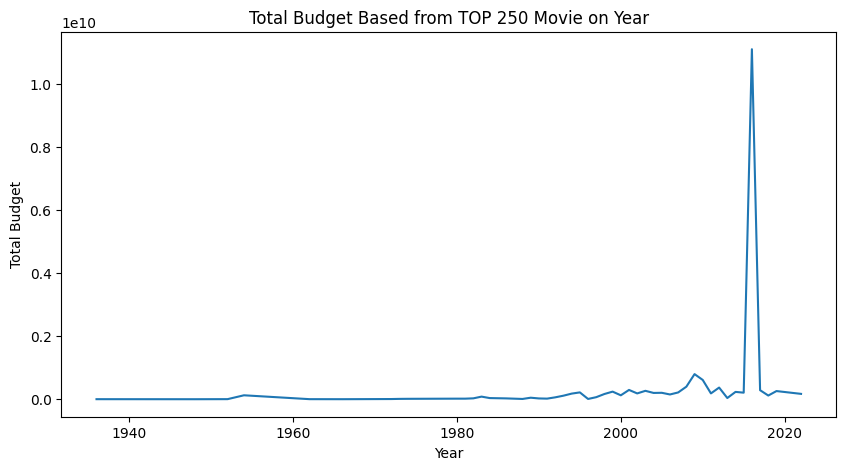

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=budget_based_movie, x=budget_based_movie.index, y='Budget')
plt.title('Total Budget Based from TOP 250 Movie on Year')
plt.xlabel('Year')
plt.ylabel('Total Budget')
plt.show()

In [30]:
rating_based_movie = data.groupby('Year').agg({
    'Rating': 'mean',
})
rating_based_movie

Rating
Year          
1925  8.100000
1928  8.100000
1931  8.300000
1936  8.500000
1948  8.300000
...        ...
2018  8.333333
2019  8.280000
2020  8.250000
2022  8.200000
2023  8.900000

[61 rows x 1 columns]

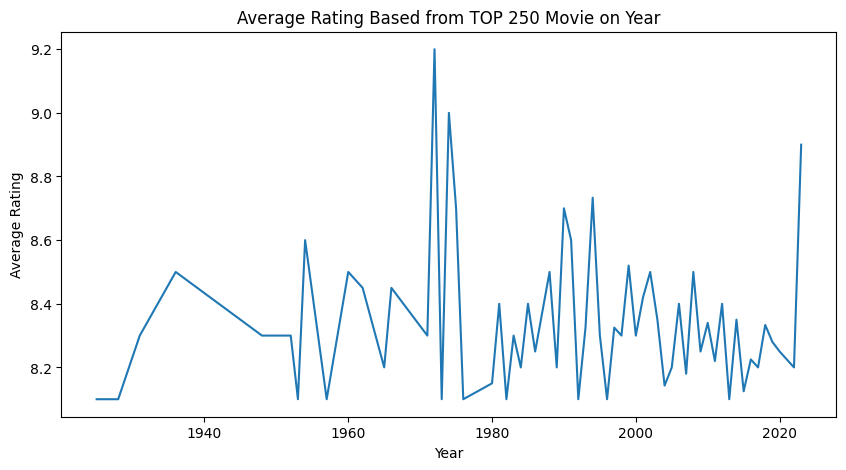

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(data=rating_based_movie, x=rating_based_movie.index, y='Rating')
plt.title('Average Rating Based from TOP 250 Movie on Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

### relationship

In [32]:
rating_duration = data[['Rating', 'Durasi(Menit)']]
rating_duration

Rating  Durasi(Menit)
1       9.2          175.0
2       9.0          152.0
3       9.0          202.0
4       9.0          195.0
5       9.0          201.0
..      ...            ...
236     8.1          154.0
240     8.1          146.0
242     8.2          163.0
244     8.0           90.0
245     8.0          156.0

[156 rows x 2 columns]

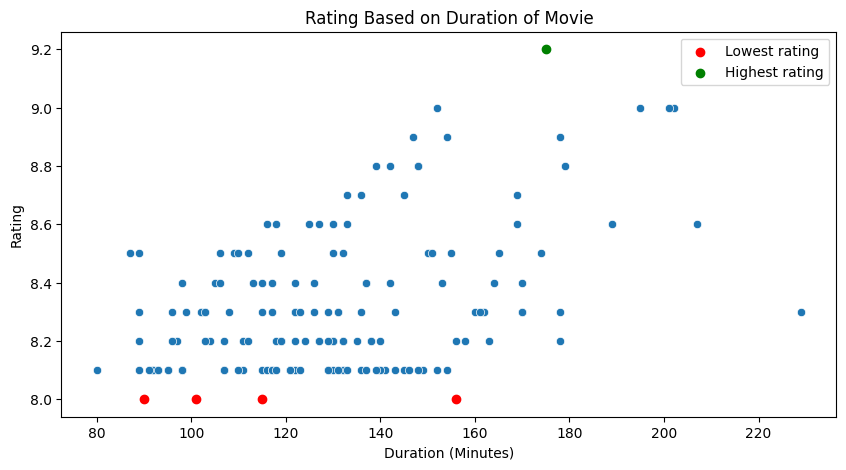

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=rating_duration, x='Durasi(Menit)', y='Rating')

# Find the movies with the highest and lowest ratings
min_rating_movie = rating_duration[rating_duration['Rating'] == rating_duration['Rating'].min()]
max_rating_movie = rating_duration[rating_duration['Rating'] == rating_duration['Rating'].max()]

plt.scatter(min_rating_movie['Durasi(Menit)'], min_rating_movie['Rating'], color='red', label='Lowest rating')
plt.scatter(max_rating_movie['Durasi(Menit)'], max_rating_movie['Rating'], color='green', label='Highest rating')

plt.title('Rating Based on Duration of Movie')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [34]:
budget_gross = data[['Budget', 'Gross_World']]
budget_gross

Budget  Gross_World
1      6000000    250342030
2    185000000   1008497140
3     13000000     47962897
4     22000000    322161245
5     94000000   1151301082
..         ...          ...
236    2000000     20908467
240   25000000    216639132
242          0            0
244   28000000    504050219
245   31000000    134095253

[156 rows x 2 columns]

hapus data dengan nilai 0

In [35]:
budget_gross = budget_gross[(budget_gross[['Budget', 'Gross_World']] != 0).all(axis=1)]
budget_gross

Budget  Gross_World
1      6000000    250342030
2    185000000   1008497140
3     13000000     47962897
4     22000000    322161245
5     94000000   1151301082
..         ...          ...
235   14600000     71108778
236    2000000     20908467
240   25000000    216639132
244   28000000    504050219
245   31000000    134095253

[131 rows x 2 columns]

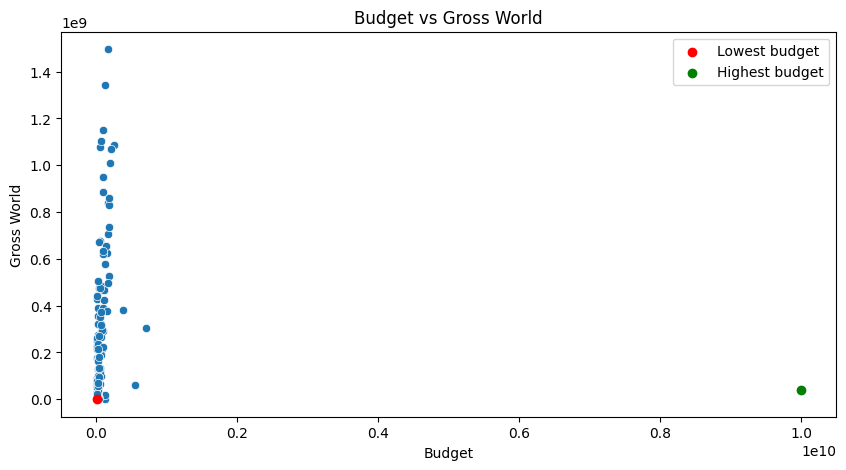

In [36]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=budget_gross, x='Budget', y='Gross_World')

min_budget_gross = budget_gross[budget_gross['Budget'] == budget_gross['Budget'].min()]
max_budget_gross = budget_gross[budget_gross['Budget'] == budget_gross['Budget'].max()]

plt.scatter(min_budget_gross['Budget'], min_budget_gross['Gross_World'], color='red', label='Lowest budget')
plt.scatter(max_budget_gross['Budget'], max_budget_gross['Gross_World'], color='green', label='Highest budget')

plt.title('Budget vs Gross World')
plt.xlabel('Budget')
plt.ylabel('Gross World')
plt.legend()
plt.show()

In [45]:
rating_budget = data[['Rating', 'Budget']]
rating_budget

Rating     Budget
1       9.2    6000000
2       9.0  185000000
3       9.0   13000000
4       9.0   22000000
5       9.0   94000000
..      ...        ...
236     8.1    2000000
240     8.1   25000000
242     8.2          0
244     8.0   28000000
245     8.0   31000000

[156 rows x 2 columns]

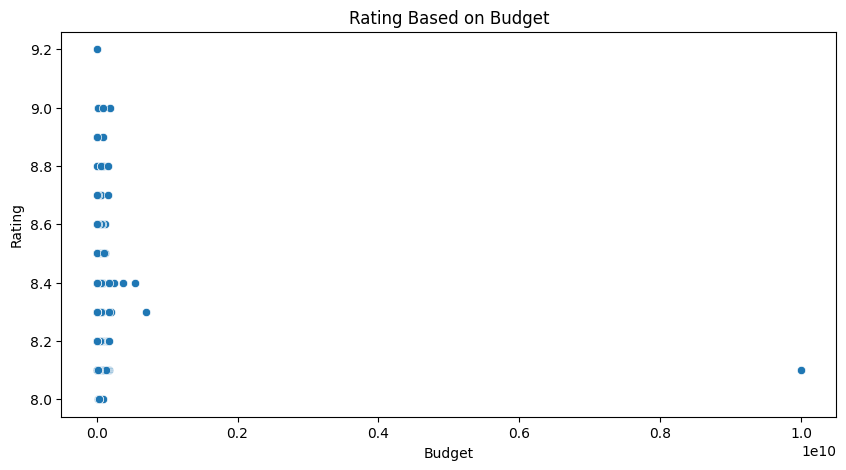

In [46]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=rating_budget, x='Budget', y='Rating')
plt.title('Rating Based on Budget')
plt.xlabel('Budget')
plt.ylabel('Rating')
plt.show()

### composition

In [37]:
rated_based_movie = data.groupby('Rated').agg({
    'Rated': 'count',
})
rated_based_movie = rated_based_movie.rename(columns={'Rated': 'Jumlah'})
rated_based_movie = rated_based_movie.sort_values(by='Jumlah', ascending=False).reset_index()

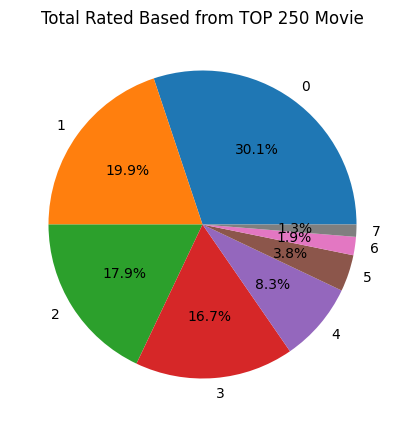

In [38]:
plt.figure(figsize=(10,5))
plt.pie(rated_based_movie['Jumlah'], labels=rated_based_movie.index, autopct='%1.1f%%')
plt.title('Total Rated Based from TOP 250 Movie')
plt.show()

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_14148\4168063358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rated_based_movie, x='Rated', y='Jumlah', palette='rocket')


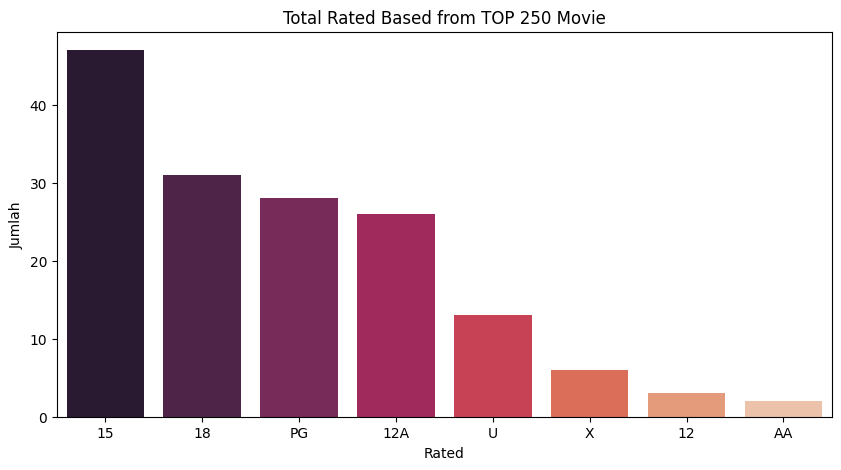

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=rated_based_movie, x='Rated', y='Jumlah', palette='rocket')
plt.title('Total Rated Based from TOP 250 Movie')
plt.show()

C:\Users\RIZKA F\AppData\Local\Temp\ipykernel_14148\2470286796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rated_based_movie, x='Rated', y='Jumlah', palette='rocket')


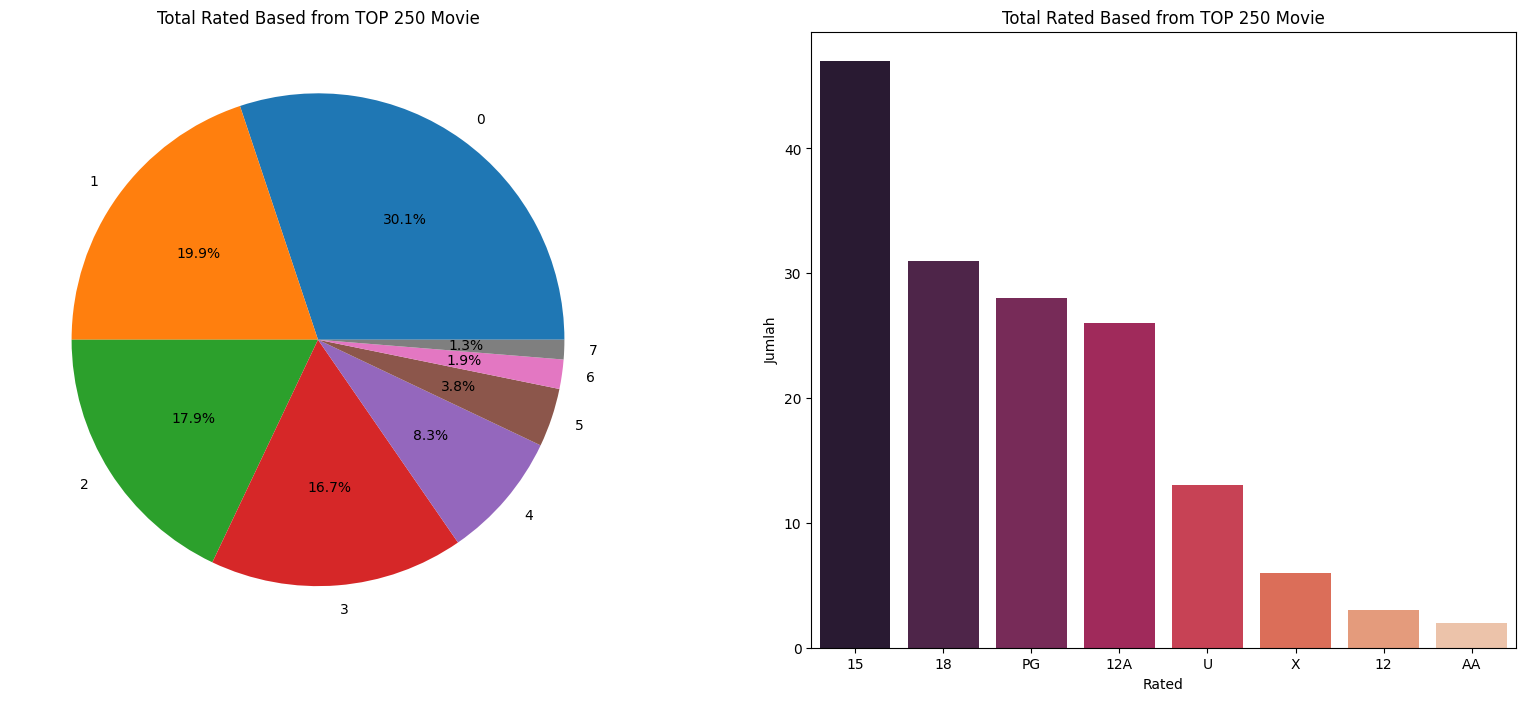

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].pie(rated_based_movie['Jumlah'], labels=rated_based_movie.index, autopct='%1.1f%%')
ax[0].set_title('Total Rated Based from TOP 250 Movie')

sns.barplot(data=rated_based_movie, x='Rated', y='Jumlah', palette='rocket')
ax[1].set_title('Total Rated Based from TOP 250 Movie')
plt.show()

In [41]:
color_based_movie = data.groupby('Color').agg({
    'Color':'count',
})

color_based_movie = color_based_movie.rename(columns={'Color':'Total'})
color_based_movie.fillna('Unknown')
color_based_movie

Total
Color                      
Black and White          15
Black and WhiteColor      3
Color                   130
ColorBlack and White      8

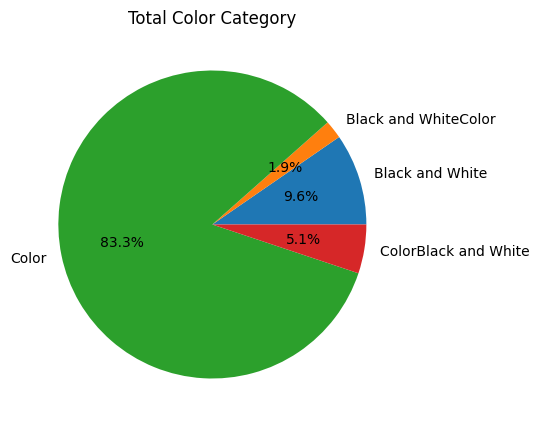

In [42]:
plt.figure(figsize=(10,5))
plt.pie(color_based_movie['Total'], labels=color_based_movie.index, autopct='%1.1f%%')
plt.title('Total Color Category')
plt.show()

### distribution

In [43]:
tren_budget = data.groupby('Year').agg({
    'Budget': 'sum'
})
tren_budget = tren_budget[tren_budget['Budget'] != 0]
tren_budget

Budget
Year             
1936      1500000
1948       133000
1952      2540800
1954    125000000
1962      2000000
1966       800000
1972      6000000
1973     11000000
1974     13000000
1980     18000000
1981     18000000
1982     28000000
1983     82500000
1984     36400000
1986     26500000
1988      8700000
1989     48000000
1990     25000000
1991     19000000
1992     60200000
1993    112600000
1994    178000000
1995    217000000
1996      8500000
1997     65180000
1998    165960000
1999    241000000
2000    124500000
2001    295000000
2002    184300000
2003    266800000
2004    199700000
2005    204000000
2006    151000000
2007    215000000
2008    398000000
2009    797000000
2010    611800000
2011    185000000
2012    370000000
2013     38000000
2014    232600000
2015    208000000
2016  11110000000
2017    287000000
2018    117000000
2019    259000000
2022    170000000

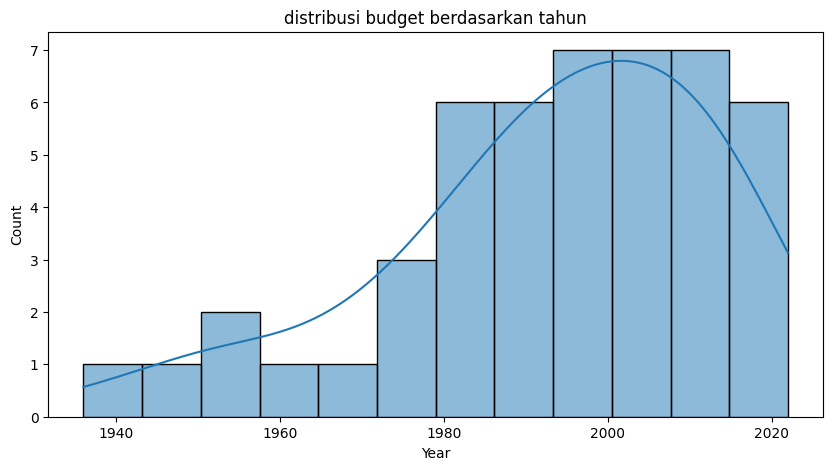

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(data=tren_budget, x='Year', bins=12, kde=True)
plt.title('distribusi budget berdasarkan tahun')
plt.show()